In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_average_data(data):
    average_data = np.zeros((len(data)//8,len(data[0]))) #new sample = average of 8 consecutive sample
    
    #calculate average
    k = 0
    n = 0
    for i in range(len(data)): 
        average_data[k] += data[i]
        
        if (n == 7):
            average_data[k] /= 8
            k += 1
            n = 0
        else:
            n += 1
            
    return average_data

# Preprocess \ Visualization

In [3]:
#Read all training samples
subject1_t1 = np.loadtxt("data_psd/train_subject1_psd01.asc")
subject1_t2 = np.loadtxt("data_psd/train_subject1_psd02.asc")
subject1_t3 = np.loadtxt("data_psd/train_subject1_psd03.asc")

subject2_t1 = np.loadtxt("data_psd/train_subject2_psd01.asc")
subject2_t2 = np.loadtxt("data_psd/train_subject2_psd02.asc")
subject2_t3 = np.loadtxt("data_psd/train_subject2_psd03.asc")

subject3_t1 = np.loadtxt("data_psd/train_subject3_psd01.asc")
subject3_t2 = np.loadtxt("data_psd/train_subject3_psd02.asc")
subject3_t3 = np.loadtxt("data_psd/train_subject3_psd03.asc")

test1 = np.loadtxt("data_psd/test_subject1_psd04.asc")
test2 = np.loadtxt("data_psd/test_subject2_psd04.asc")
test3 = np.loadtxt("data_psd/test_subject3_psd04.asc")

labels1 = np.loadtxt("data_psd/labels1.asc")
labels2 = np.loadtxt("data_psd/labels2.asc")
labels3 = np.loadtxt("data_psd/labels3.asc")

subject1 = np.concatenate((subject1_t1, subject1_t2, subject1_t3), axis=0)
subject2 = np.concatenate((subject2_t1, subject2_t2, subject2_t3), axis=0)
subject3 = np.concatenate((subject3_t1, subject3_t2, subject3_t3), axis=0)

test = np.concatenate((test1,test2,test3), axis=0)
labels = np.concatenate((labels1,labels2,labels3), axis=0)

#add labels to data
raw_test = np.zeros((len(test),len(test[0])+1))
raw_test[:,:-1] = test
raw_test[:,96] = labels

raw_training = np.concatenate((subject1,subject2,subject3), axis=0)

In [4]:
training = get_average_data(raw_training)
test = get_average_data(raw_test)
all_data = np.concatenate((training,test), axis=0)

In [14]:
#summary
data = pd.DataFrame(all_data)
data[96] = data[96].replace([2.0, 3.0, 7.0], ['left','right', 'word'])
data
N = 96

In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
count,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,...,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000
mean,0.021575,0.024250,0.019504,0.010491,0.007362,0.006689,0.006400,0.005867,0.004821,0.003996,...,0.014712,0.011387,0.009647,0.008544,0.007365,0.006338,0.005449,0.004821,0.004207,0.003624
std,0.015374,0.020438,0.014653,0.006633,0.004321,0.004116,0.003902,0.003725,0.002983,0.002668,...,0.007970,0.006467,0.005478,0.005004,0.004398,0.003860,0.003240,0.002978,0.002633,0.002297
min,0.001590,0.001153,0.001168,0.000854,0.000356,0.000374,0.000328,0.000454,0.000362,0.000274,...,0.001063,0.001031,0.001107,0.000511,0.000613,0.000551,0.000496,0.000189,0.000275,0.000334
25%,0.011702,0.011131,0.009700,0.005915,0.004324,0.003837,0.003721,0.003347,0.002718,0.002144,...,0.009012,0.006880,0.005725,0.005081,0.004234,0.003625,0.003126,0.002754,0.002380,0.002025
50%,0.017517,0.017409,0.015415,0.009065,0.006534,0.005728,0.005524,0.005033,0.004149,0.003328,...,0.013063,0.010043,0.008600,0.007465,0.006506,0.005581,0.004781,0.004163,0.003641,0.003130
75%,0.026396,0.029478,0.024749,0.013309,0.009376,0.008517,0.008080,0.007387,0.006128,0.005136,...,0.018741,0.014386,0.012408,0.010898,0.009444,0.008110,0.007006,0.006119,0.005363,0.004672
max,0.169052,0.154352,0.139760,0.083383,0.083631,0.061253,0.044344,0.045037,0.031507,0.022354,...,0.102134,0.074045,0.063084,0.073190,0.059685,0.054842,0.033016,0.037404,0.030816,0.041913


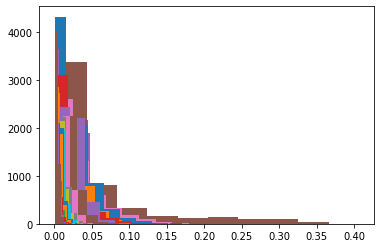

In [15]:
#distributions/outliers
for i in range(0,N):
    plt.hist(data[i])  


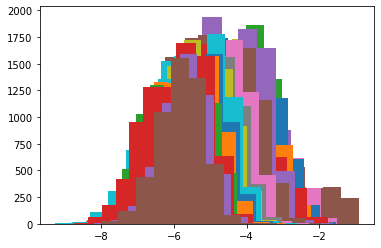

In [16]:
for i in range(0,N):
    plt.hist(np.log(data[i]))


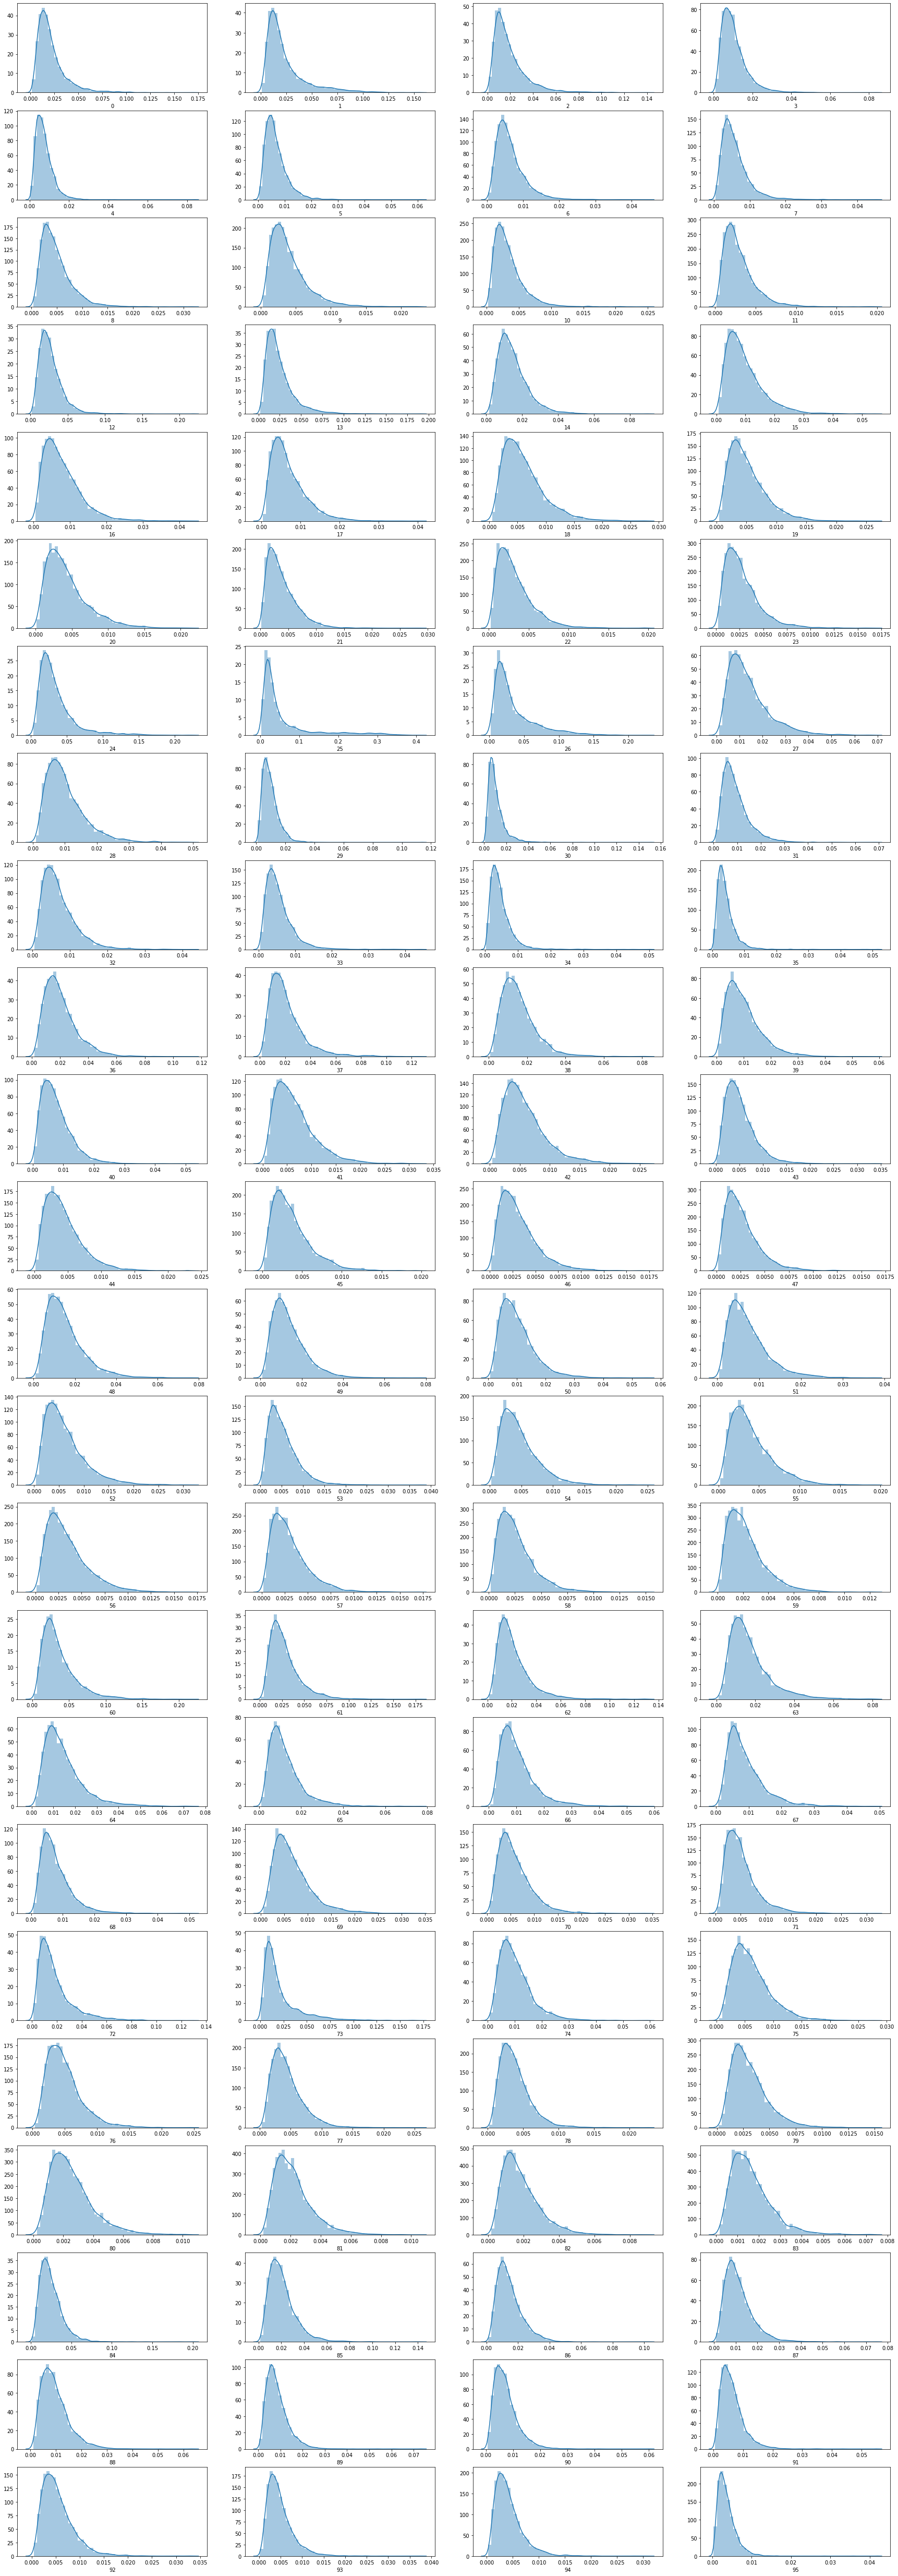

In [17]:
fig = plt.figure(figsize=(30,90))

for i in range(0,N):
    ax = fig.add_subplot(24,4,i+1)
    sns.distplot(data[i])

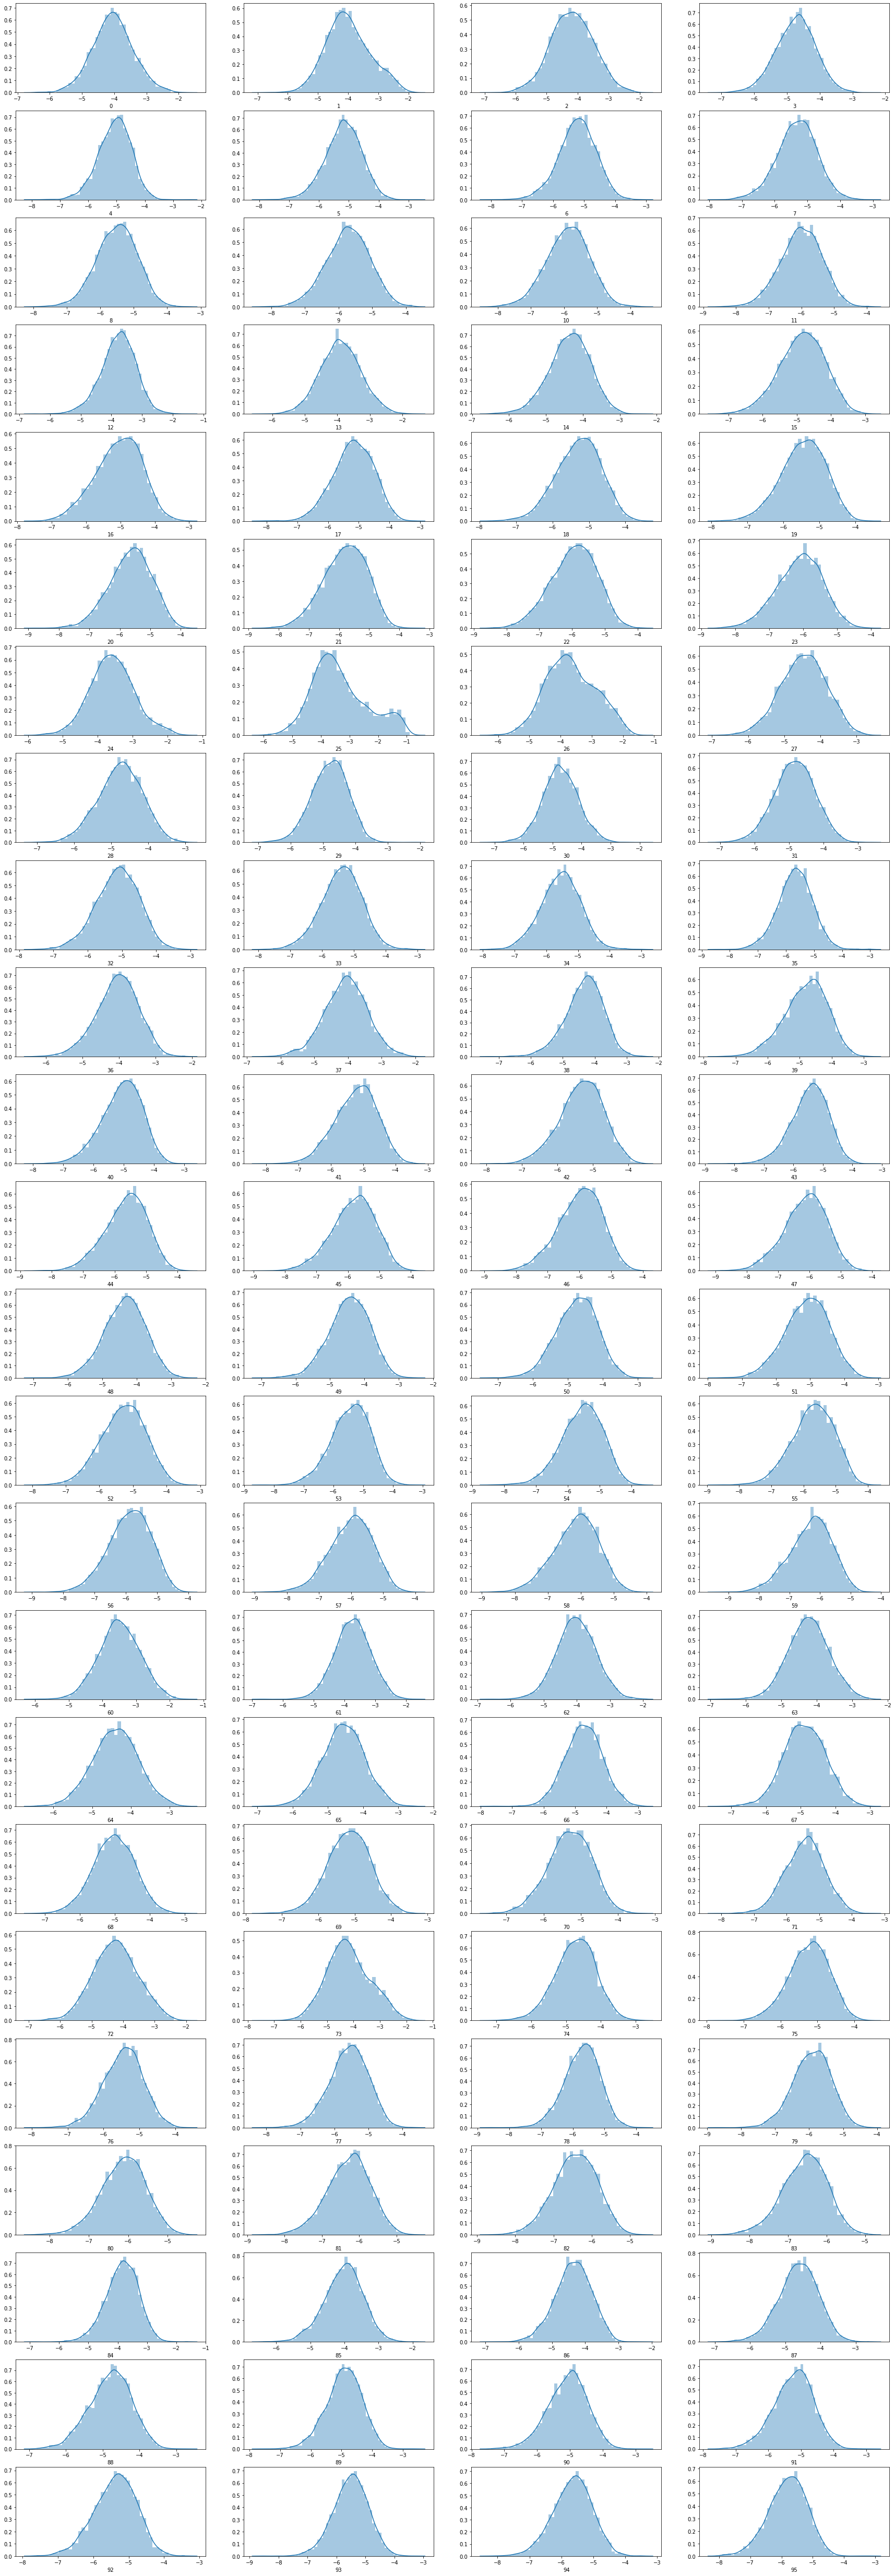

In [18]:
fig = plt.figure(figsize=(30,90))

for i in range(0,N):
    ax = fig.add_subplot(24,4,i+1)
    sns.distplot(np.log(data[i]))
       

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(100, 100))
#plot = sns.heatmap(data=correlation_matrix, annot=True)

#fig = plot.get_figure()
#fig.savefig("output.png")

In [121]:
# LDA classification/visualization

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
data_trans = pd.DataFrame(lda_model.fit_transform(np.log(X_train), y_train))

print('Priors:')
pd.DataFrame(lda_model.priors_)
print('Means:')
pd.DataFrame(lda_model.means_)
print('Coefs:')
pd.DataFrame(lda_model.scalings_)
print('Explained Variance Ratio')
pd.DataFrame(lda_model.explained_variance_ratio_ )

Priors:
Means:
Coefs:
Explained Variance Ratio


,0
0,0.533444
1,0.466556


In [122]:
print(lda_model.score(np.log(X_test),y_test))

0.5963302752293578


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc98db5f0f0>,
      dtype=object)

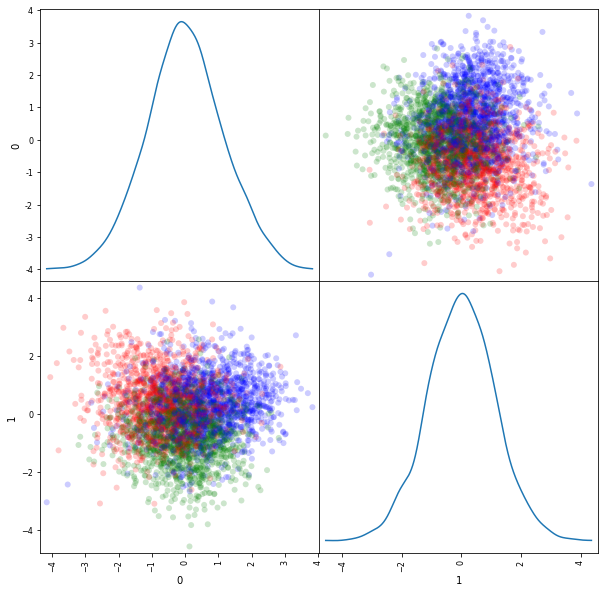

In [123]:
from pandas.plotting import scatter_matrix

colors_class = {2.0:'r', 3.0:'g', 7.0:'b'}

scatter_matrix(data_trans, 
               alpha=0.2, 
               figsize=(10, 10), 
               diagonal='kde',
               marker='o', 
               c=list(map(lambda x: colors_class[x], y_train) ))




In [124]:
#PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
        
GroupedData = data.sort_values('Class')
GroupedFeatures = GroupedData.drop(columns='Class')

myPCA = PCA(whiten=True)
myPCA.fit(StandardScaler().fit_transform(GroupedFeatures));
transformed = myPCA.transform(GroupedFeatures)

transformed = pd.DataFrame(transformed)
transformed['Class'] = pd.DataFrame(GroupedData['Class']).astype('category')

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x=0, y=1, hue='Class',
                     data=transformed)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.title("Transformed data using PCA components");
print('Explained Variance Ratios: \n ',myPCA.explained_variance_ratio_)  

KeyError: 'Class'

# Linear Models


In [29]:
#prepare data for models (separate labels)
X_train = np.delete(training, 96, 1)
X_test = np.delete(test, 96, 1)

#X_train = np.log(X_train)
#X_test = np.log(X_test)

y_train = training[:,96]
y_test = test[:,96]

### Naive Bayes, Gaussian

In [30]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
model



GaussianNB(priors=None, var_smoothing=1e-09)

In [148]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.518348623853211

### MLP WITH CROSS-VALIDATION

In [314]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha' : [1e-4], 'random_state' : [1] , 'hidden_layer_sizes':[(8), (7), (6), (9)], 'solver' : ['adam', 'sgd','lbfgs'], 'activation': ['identity', 'logistic', 'tanh', 'relu']
}

#model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)

model = MLPClassifier(random_state=1, max_iter= 2000)

search = GridSearchCV(model, param_grid)
search.fit(X_train, y_train)

#model.fit(X_train, y_train)

c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_per

c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_per

c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_per

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=2000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_s...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['

In [315]:
search.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [316]:
search.cv_results_

{'mean_fit_time': array([ 4.22924485,  0.22210779,  2.50564551,  4.83229847,  0.13777161,
         2.68342738,  4.43775191,  0.29115739,  3.01579666,  4.68100443,
         0.20863757,  2.94215651,  8.38342533,  0.1986721 ,  4.62820802,
         8.37401361,  0.219203  ,  4.58482347,  7.48665013,  0.25241013,
         4.58554173,  8.71018882,  0.21697869,  4.91953306,  5.67109475,
         0.24360943,  5.31336646,  6.02618113,  0.14252086,  4.9763998 ,
         6.21637135,  0.296065  ,  4.86388364,  5.76886344,  0.22494597,
         5.38806834, 16.17425904,  0.26117635,  4.7360651 , 11.0190764 ,
         0.16930256,  4.04110703,  7.07426744,  0.4995532 ,  2.6956615 ,
        12.94410572,  0.31235952,  5.47996516]),
 'std_fit_time': array([5.64272794e-01, 1.55808235e-02, 3.93394547e-01, 2.71707102e-01,
        1.07200584e-02, 1.90928347e-01, 2.86787193e-01, 1.33584974e-02,
        3.44081789e-01, 3.12409871e-01, 4.51348661e-03, 2.35058363e-01,
        9.87752776e-01, 4.37521344e-02, 4.968

In [317]:
#y_pred = model.predict(X_test)
#model.score(X_test,y_test)
search.predict(X_test)
print(search.score(X_test,y_test))

search.predict(X_train)
print(search.score(X_train, y_train))

0.5986238532110092
0.6494105586878524


In [318]:
param_grid = {
    'alpha' : [1e-4], 'random_state' : [1] , 'hidden_layer_sizes':[(8)], 'solver' : ['adam'], 'activation': ['relu']
}

#model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)

model = MLPClassifier(random_state=1, max_iter= 2000)

search = GridSearchCV(model, param_grid)
search.fit(X_train, y_train)

search.predict(X_test)
print(search.score(X_test,y_test))

search.predict(X_train)
print(search.score(X_train, y_train))

0.6131498470948012
0.6545361353152229


Mejor resultado hasta ahora para training, pero no el mejor para test: 18 o 7 -> 0.6100917431192661

La diferencia con el 2º mejor no es tan alta y en el test tiene mejor resultado a pesar que en el training es peor, además es computacionalmente más sencillo de calcular
: 8 -> 0.6131498470948012

### Cross validate

In [165]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

model = MLPClassifier()
scores = cross_validate(model, X_train, y_train, cv=3,return_train_score=True, return_estimator= True)

/usr/lib64/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib64/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib64/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [166]:
scores

{'fit_time': array([11.67479038, 12.16999698, 11.96376634]),
 'score_time': array([0.0064261 , 0.00785971, 0.00785637]),
 'estimator': (MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
         beta_2=0.999, early_stopping=False, epsilon=1e-08,
         hidden_layer_sizes=(100,), learning_rate='constant',
         learning_rate_init=0.001, max_iter=200, momentum=0.9,
         n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
         random_state=None, shuffle=True, solver='adam', tol=0.0001,
         validation_fraction=0.1, verbose=False, warm_start=False),
  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
         beta_2=0.999, early_stopping=False, epsilon=1e-08,
         hidden_layer_sizes=(100,), learning_rate='constant',
         learning_rate_init=0.001, max_iter=200, momentum=0.9,
         n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
         random_state=None, shuffle=True, solver='adam', tol=0.

### MULTIPLE LAYER WITH CROSS-VALIDATION

In [311]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha' : [1e-4], 'hidden_layer_sizes':[(7,8),(7,6),(7,10),(7)] ,'solver' : ['adam', 'sgd','lbfgs'], 'random_state' : [545] , 'nesterovs_momentum': [True], 'momentum': [0.9], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'learning_rate':['constant'],'epsilon':[1e-08], 'warm_start':[False]
}

#model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)

model = MLPClassifier(random_state=1, max_iter= 2000)

search = GridSearchCV(model, param_grid)
search.fit(X_train, y_train)
search.cv_results_

#model.fit(X_train, y_train)

c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_per

c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_per

c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_per

c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\lorenzo\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'mean_fit_time': array([ 2.95143609,  0.39499588,  4.64265151,  3.77640691,  0.26252999,
         3.99639339,  3.05897446,  0.28423772,  4.68640699,  3.83064508,
         0.26033125,  2.84089818,  0.23239512,  0.24738827,  6.33096061,
         0.18010635,  0.21117778,  6.01146917,  4.54002347,  0.21888008,
         5.30549541,  8.21964445,  0.1778594 ,  4.37962208,  4.35880828,
         0.26940022,  7.15308075,  4.51648073,  0.29178429,  6.35845656,
         3.84301167,  0.24881802,  7.20038528,  4.09005232,  0.30033913,
         4.94699039,  8.92464228,  0.4900156 ,  7.49983578,  9.41616116,
         0.40723491,  6.70398989,  7.47956858,  0.31969299,  7.66297927,
        11.24555702,  0.34260316,  3.91890259]),
 'std_fit_time': array([3.60149220e-01, 1.95178294e-01, 2.30691587e-01, 5.86638375e-01,
        1.80034892e-02, 5.07248552e-01, 4.55731131e-01, 1.81075133e-02,
        3.87977488e-01, 2.86797941e-01, 2.02860580e-02, 2.28608360e-01,
        4.26264310e-02, 5.58458325e-03, 4.263

In [312]:
search.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=545, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [313]:
search.predict(X_test)
print("Test:  " + str(search.score(X_test,y_test)))

search.predict(X_train)
print("Train: " + str(search.score(X_train, y_train)))

Test:  0.6215596330275229
Train: 0.6609431060994362
